In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

 99% 119M/121M [00:00<00:00, 130MB/s]
100% 121M/121M [00:00<00:00, 127MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/face-expression-recognition-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
# train_ds = keras.utils.image_dataset_from_directory(
#     directory = '/content/images/train',
#     labels='inferred',
#     label_mode = 'int',
#     batch_size=32,
#     image_size=(256,256)
# )

# validation_ds = keras.utils.image_dataset_from_directory(
#     directory = '/content/images/validation',
#     labels='inferred',
#     label_mode = 'int',
#     batch_size=32,
#     image_size=(256,256)
# )
picture_size = 48
batch_size  = 32

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_ds = datagen_train.flow_from_directory("/content/images/train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


validation_ds = datagen_val.flow_from_directory("/content/images/validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
# Normalize
# def process(image,label):
#     image = tf.cast(image/255. ,tf.float32)
#     print(image.shape)
#     return image,label

# train_ds = train_ds.map(process)
# validation_ds = validation_ds.map(process)

In [ ]:
train_ds.image_shape

(48, 48, 1)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(7,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 256)       2560      
                                                                 
 batch_normalization (Batch  (None, 46, 46, 256)       1024      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 128)       295040    
                                                                 
 batch_normalization_1 (Bat  (None, 21, 21, 128)       512       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# history = model.fit(train_ds,epochs=1,validation_data=validation_ds)
history = model.fit(train_ds,
                                steps_per_epoch=train_ds.n//train_ds.batch_size,
                                epochs=10,
                                validation_data = validation_ds,
                                validation_steps = validation_ds.n//validation_ds.batch_size
                                )

Epoch 1/10
900/900 [==============================] - 28s 24ms/step - loss: 1.7456 - accuracy: 0.3005 - val_loss: 1.6567 - val_accuracy: 0.3308
Epoch 2/10
900/900 [==============================] - 20s 22ms/step - loss: 1.5157 - accuracy: 0.3956 - val_loss: 1.4579 - val_accuracy: 0.4334
Epoch 3/10
900/900 [==============================] - 20s 23ms/step - loss: 1.4238 - accuracy: 0.4391 - val_loss: 1.4798 - val_accuracy: 0.4328
Epoch 4/10
900/900 [==============================] - 20s 23ms/step - loss: 1.3509 - accuracy: 0.4758 - val_loss: 1.3924 - val_accuracy: 0.4736
Epoch 5/10
900/900 [==============================] - 18s 20ms/step - loss: 1.2939 - accuracy: 0.4997 - val_loss: 1.4371 - val_accuracy: 0.4365
Epoch 6/10
900/900 [==============================] - 18s 20ms/step - loss: 1.2457 - accuracy: 0.5164 - val_loss: 1.3970 - val_accuracy: 0.4628
Epoch 7/10
900/900 [==============================] - 20s 23ms/step - loss: 1.1978 - accuracy: 0.5393 - val_loss: 1.2900 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt

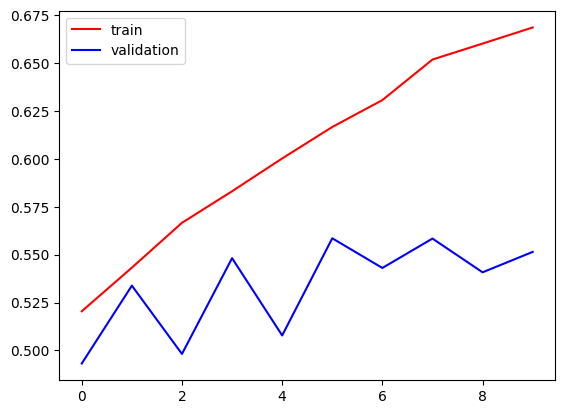

In [ ]:

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

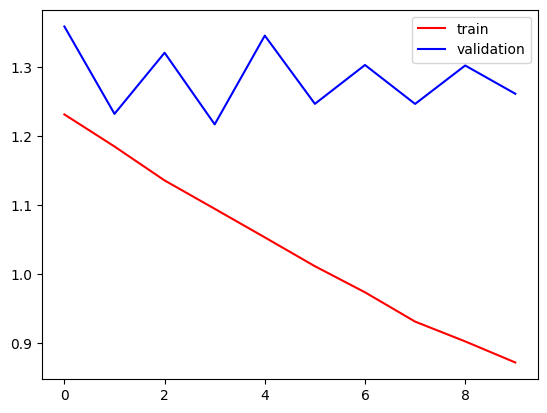

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread("/content/images/images/train/neutral/10024.jpg")

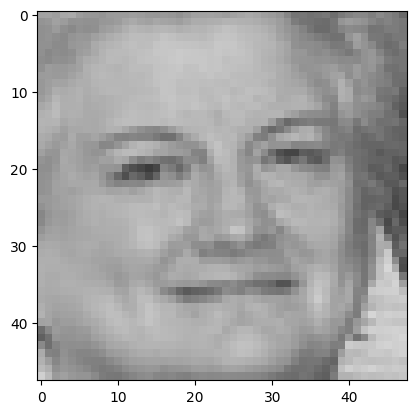

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img = cv2.resize(test_img,(48,48))

In [ ]:
test_img.shape

(48, 48, 3)

In [ ]:
gray_image = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

In [ ]:
gray_image.shape

(48, 48)

In [ ]:
test_input = gray_image.reshape(1,48, 48)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 420ms/step


array([[0.08989783, 0.00347038, 0.34389   , 0.0120366 , 0.21399151,
        0.20552047, 0.1311932 ]], dtype=float32)

In [ ]:
model.save('saved_model')

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# LeNet-5 Implementation Using Pytorch

In [ ]:
import torch
import torch.nn as nn
import  torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
import torch.nn as nn

In [ ]:
class LeNet(nn.Module):
  def __init__(self, num_classes):
    super(LeNet, self).__init__()
    self.relu = nn.ReLU()
    self.pool = nn.AvgPool2d(kernel_size=(2,2), stride=(2,2))
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(5,5), stride=(1,1), padding=(0,0))
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5), stride=(1,1), padding=(0,0))
    self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=(5,5), stride=(1,1), padding=(0,0))
    self.linear1 = nn.Linear(120, 84)
    self.linear2 = nn.Linear(84, num_classes)

  def forward(self, x):
    x = self.relu(self.conv1(x))
    x = self.pool(x)
    x = self.relu(self.conv2(x))
    x = self.pool(x)
    x = self.relu(self.conv3(x))
    x = x.reshape(x.shape[0], -1)

    x = self.relu(self.linear1(x))
    x = self.linear2(x)

    return x


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
num_classes = 7
learning_rate = 0.001
batch_size = 32
num_epochs = 10

In [ ]:
model = LeNet(num_classes=num_classes).to(device)

In [ ]:
print(model)

LeNet(
  (relu): ReLU()
  (pool): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (linear1): Linear(in_features=120, out_features=84, bias=True)
  (linear2): Linear(in_features=84, out_features=7, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
# Define transforms to apply to the data
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize images to 224x224
    transforms.ToTensor(),           # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize the image tensors
])

In [ ]:
# Define the dataset
train_dataset = datasets.ImageFolder(root='/content/images/images/train', transform=transform)

# Define the data loader
batch_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)


In [ ]:
# Define the dataset
validation_dataset = datasets.ImageFolder(root='/content/images/images/validation', transform=transform)

# Define the data loader
batch_size = 32
validation_loader = DataLoader(dataset=validation_dataset, batch_size=batch_size, shuffle=True)


In [ ]:
for epoch in range(num_epochs):
  for batch_idx,(data, targets) in enumerate(train_loader):
    data = data.to(device = device)
    # print(batch_idx)
    targets = targets.to(device = device)
    scores = model(data)
    print(data.shape)
    loss = criterion(scores, targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
def check_accuracy(loader, model):
  num_correct = 0
  num_samples = 0
  model.eval()

  with torch.no_grad():
    for x,y in loader:
      # print(x,y)
      x = x.to(device=device)
      y = y.to(device=device)
      # x = x.reshape(x.shape[0], -1)

      scores = model(x)
      _, predictions = scores.max(1)
      num_correct += (predictions == y).sum()
      num_samples += predictions.size(0)

    print(num_correct / num_samples)
  model.train()
  # return acc


check_accuracy(train_loader, model)

tensor(0.6104, device='cuda:0')


In [ ]:
# torch.save(model, 'LeNet.pth')

In [ ]:
# loaded_model = torch.load('/content/LeNet.pth', map_location=torch.device('cpu'))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import cv2

In [ ]:
img = cv2.imread("/content/images/images/train/neutral/10014.jpg")

In [ ]:
test_img = cv2.resize(img,(32,32))

In [ ]:
gray_image = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

In [ ]:
test_input = gray_image.reshape(3,32, 32)

In [ ]:
test_input = torch.tensor(test_input)

In [ ]:
test_input = test_input.to('cuda:0')
test_input = test_input.float()

In [ ]:
device = test_input.device
model.to(device)

LeNet(
  (relu): ReLU()
  (pool): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (linear1): Linear(in_features=120, out_features=84, bias=True)
  (linear2): Linear(in_features=84, out_features=7, bias=True)
)

In [ ]:
test_input = test_input.reshape(1,3,32,32)

In [ ]:
test_input.shape

torch.Size([1, 3, 32, 32])

In [ ]:
print("Input device:", test_input.device)
print("Weights device:", model.conv1.weight.device)

Input device: cuda:0
Weights device: cuda:0


In [ ]:
scores = model(test_input)
_, predictions = scores.max(1)

In [ ]:
scores

tensor([[ 21.4836, -65.6392,  16.1878, -61.3975,   0.7090,  -0.8016, -16.2973]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
## ALEX NET

In [ ]:


# VGG_types = {
#     "VGG11": [64, "M", 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
#     "VGG13": [64, 64, "M", 128, 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
#     "VGG16": [
#         64,
#         64,
#         "M",
#         128,
#         128,
#         "M",
#         256,
#         256,
#         256,
#         "M",
#         512,
#         512,
#         512,
#         "M",
#         512,
#         512,
#         512,
#         "M",
#     ],
#     "VGG19": [
#         64,
#         64,
#         "M",
#         128,
#         128,
#         "M",
#         256,
#         256,
#         256,
#         256,
#         "M",
#         512,
#         512,
#         512,
#         512,
#         "M",
#         512,
#         512,
#         512,
#         512,
#         "M",
#     ],
# }


# class VGG_net(nn.Module):
#     def __init__(self, in_channels=3, num_classes=7):
#         super(VGG_net, self).__init__()
#         self.in_channels = in_channels
#         self.conv_layers = self.create_conv_layers(VGG_types["VGG16"])

#         self.fcs = nn.Sequential(
#             nn.Linear(512 * 7 * 7, 4096),
#             nn.ReLU(),
#             nn.Dropout(p=0.5),
#             nn.Linear(4096, 4096),
#             nn.ReLU(),
#             nn.Dropout(p=0.5),
#             nn.Linear(4096, num_classes),
#         )

#     def forward(self, x):
#         x = self.conv_layers(x)
#         x = x.reshape(x.shape[0], -1)
#         x = self.fcs(x)
#         return x

#     def create_conv_layers(self, architecture):
#         layers = []
#         in_channels = self.in_channels

#         for x in architecture:
#             if type(x) == int:
#                 out_channels = x

#                 layers += [
#                     nn.Conv2d(
#                         in_channels=in_channels,
#                         out_channels=out_channels,
#                         kernel_size=(3, 3),
#                         stride=(1, 1),
#                         padding=(1, 1),
#                     ),
#                     nn.BatchNorm2d(x),
#                     nn.ReLU(),
#                 ]
#                 in_channels = x
#             elif x == "M":
#                 layers += [nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))]

#         return nn.Sequential(*layers)




In [ ]:
class VGG16(nn.Module):
    def __init__(self, num_classes=7):
        super(VGG16, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv7 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.relu(self.conv3(x))
        x = self.pool(self.relu(self.conv4(x)))
        x = self.relu(self.conv5(x))
        x = self.relu(self.conv6(x))
        x = self.pool(self.relu(self.conv7(x)))
        x = x.view(-1, 256 * 4 * 4)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model


In [ ]:
model = VGG16(num_classes=7)

In [ ]:
for epoch in range(num_epochs):
  for batch_idx,(data, targets) in enumerate(train_loader):
    data = data.to(device = device)
    # print(batch_idx)
    targets = targets.to(device = device)
    scores = model(data)
    loss = criterion(scores, targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
def check_accuracy(loader, model):
  num_correct = 0
  num_samples = 0
  model.eval()

  with torch.no_grad():
    for x,y in loader:
      # print(x,y)
      x = x.to(device=device)
      y = y.to(device=device)
      # x = x.reshape(x.shape[0], -1)

      scores = model(x)
      _, predictions = scores.max(1)
      num_correct += (predictions == y).sum()
      num_samples += predictions.size(0)

    print(num_correct / num_samples)
  model.train()
  # return acc


check_accuracy(train_loader, model)

tensor(0.2394)


In [ ]:
torch.save(model, 'VGG16.pth')